<a href="https://colab.research.google.com/github/itz-sayak/Tic-tac-toe/blob/main/Trading_using_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install stable-baselines3[extra] gym-anytrading gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 16.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.0 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446659 sha256=0faa194e8e90b73831c6bbcf6be772802a2d30dc09513cd882a693cd11fb3c90
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [55]:
!pip install sb3-contrib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 1.6 MB/s eta 0:00:00


In [56]:
import gym
import gym_anytrading

from sb3_contrib import RecurrentPPO
from stable_baselines3 import A2C
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [21]:
df = pd.read_csv('/content/Download Data - STOCK_US_XNYS_GME.csv')

In [22]:
df.head()

,Date,Open,High,Low,Close,Volume
0,08/01/2023,21.95,22.00,21.26,21.50,"2,574,804"
1,07/31/2023,22.00,22.38,21.85,22.20,"1,975,391"
2,07/28/2023,22.02,22.49,21.79,21.93,"2,647,747"
3,07/27/2023,22.94,23.49,22.13,22.22,"3,370,913"
4,07/26/2023,22.70,22.99,22.48,22.70,"1,489,152"


In [23]:
df.replace(',', '', regex=True, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [24]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
251,2022-08-01,33.80,35.71,33.77,34.78,4196630
250,2022-08-02,35.90,36.80,35.12,35.84,4697134
249,2022-08-03,36.22,38.01,36.00,37.93,5186482
248,2022-08-04,38.34,39.89,37.89,38.36,5421500
247,2022-08-05,37.37,40.43,36.56,40.02,8124235


In [25]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-01,33.80,35.71,33.77,34.78,4196630
2022-08-02,35.90,36.80,35.12,35.84,4697134
2022-08-03,36.22,38.01,36.00,37.93,5186482
2022-08-04,38.34,39.89,37.89,38.36,5421500
2022-08-05,37.37,40.43,36.56,40.02,8124235


In [26]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [ ]:
df = df.astype({
    'Open': float,
    'High': float,
    'Low': float,
    'Close': float,
    'Volume': float
})

In [28]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,251), window_size=5)

In [29]:
env.signal_features

array([[ 3.478e+01,  0.000e+00],
       [ 3.584e+01,  1.060e+00],
       [ 3.793e+01,  2.090e+00],
       [ 3.836e+01,  4.300e-01],
       [ 4.002e+01,  1.660e+00],
       [ 4.345e+01,  3.430e+00],
       [ 4.037e+01, -3.080e+00],
       [ 4.053e+01,  1.600e-01],
       [ 3.945e+01, -1.080e+00],
       [ 4.074e+01,  1.290e+00],
       [ 3.968e+01, -1.060e+00],
       [ 4.219e+01,  2.510e+00],
       [ 4.052e+01, -1.670e+00],
       [ 3.793e+01, -2.590e+00],
       [ 3.649e+01, -1.440e+00],
       [ 3.450e+01, -1.990e+00],
       [ 3.353e+01, -9.700e-01],
       [ 3.250e+01, -1.030e+00],
       [ 3.196e+01, -5.400e-01],
       [ 3.094e+01, -1.020e+00],
       [ 3.155e+01,  6.100e-01],
       [ 2.984e+01, -1.710e+00],
       [ 2.864e+01, -1.200e+00],
       [ 2.763e+01, -1.010e+00],
       [ 2.736e+01, -2.700e-01],
       [ 2.514e+01, -2.220e+00],
       [ 2.404e+01, -1.100e+00],
       [ 2.583e+01,  1.790e+00],
       [ 2.892e+01,  3.090e+00],
       [ 2.924e+01,  3.200e-01],
       [ 2

In [12]:
env.action_space

Discrete(2)

info {'total_reward': -6.629999999999988, 'total_profit': 0.3238668229435967, 'position': 0}


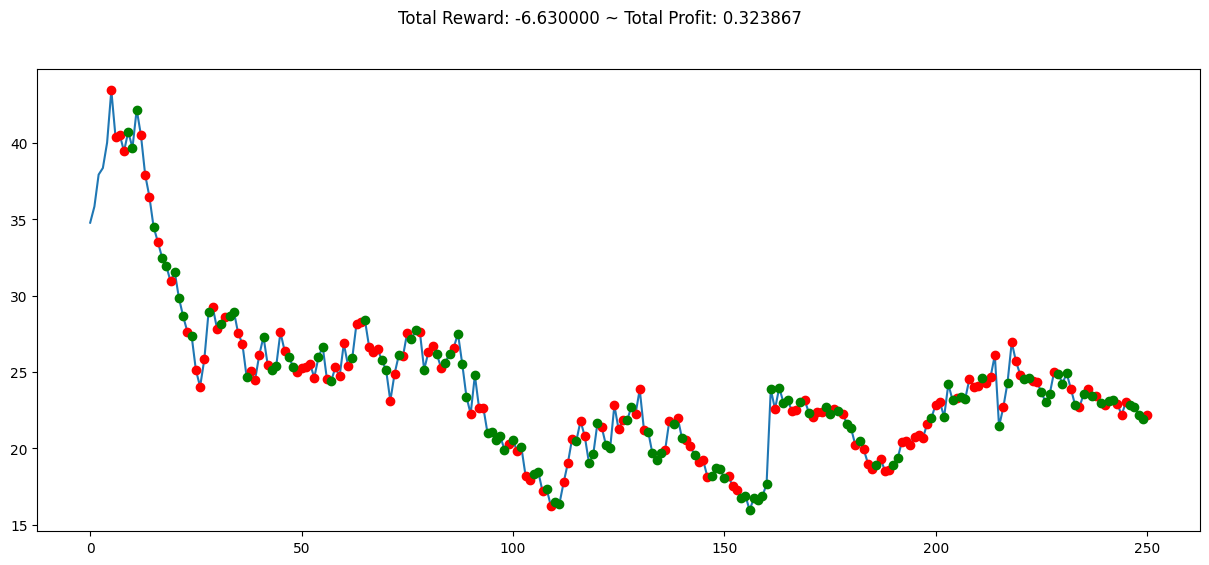

In [31]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [32]:
!pip install finta

In [33]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [34]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

In [35]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [36]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [37]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2022-08-01,33.80,35.71,33.77,34.78,4196630.0,0.000000,0.000000,0.0
2022-08-02,35.90,36.80,35.12,35.84,4697134.0,0.000000,100.000000,4697134.0
2022-08-03,36.22,38.01,36.00,37.93,5186482.0,0.000000,100.000000,9883616.0
2022-08-04,38.34,39.89,37.89,38.36,5421500.0,0.000000,100.000000,15305116.0
2022-08-05,37.37,40.43,36.56,40.02,8124235.0,0.000000,100.000000,23429351.0
2022-08-08,41.29,47.99,40.75,43.45,18045600.0,0.000000,100.000000,41474951.0
2022-08-09,42.14,43.19,39.00,40.37,6954188.0,0.000000,70.173063,34520763.0
2022-08-10,42.00,42.00,38.63,40.53,5434675.0,0.000000,70.662599,39955438.0
2022-08-11,40.91,41.97,39.35,39.45,5140480.0,0.000000,63.130697,34814958.0


In [38]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [39]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals

env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [42]:
env2.signal_features

array([[ 3.37700000e+01,  4.19663000e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 3.51200000e+01,  4.69713400e+06,  0.00000000e+00,
         1.00000000e+02,  4.69713400e+06],
       [ 3.60000000e+01,  5.18648200e+06,  0.00000000e+00,
         1.00000000e+02,  9.88361600e+06],
       [ 3.78900000e+01,  5.42150000e+06,  0.00000000e+00,
         1.00000000e+02,  1.53051160e+07],
       [ 3.65600000e+01,  8.12423500e+06,  0.00000000e+00,
         1.00000000e+02,  2.34293510e+07],
       [ 4.07500000e+01,  1.80456000e+07,  0.00000000e+00,
         1.00000000e+02,  4.14749510e+07],
       [ 3.90000000e+01,  6.95418800e+06,  0.00000000e+00,
         7.01730630e+01,  3.45207630e+07],
       [ 3.86300000e+01,  5.43467500e+06,  0.00000000e+00,
         7.06625986e+01,  3.99554380e+07],
       [ 3.93500000e+01,  5.14048000e+06,  0.00000000e+00,
         6.31306970e+01,  3.48149580e+07],
       [ 3.91500000e+01,  5.12004000e+06,  0.00000000e+00,
         6.75762781e+01

In [43]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [57]:
model = RecurrentPPO('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=1000000)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
|    value_loss           | 0.367        |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 89          |
|    ep_rew_mean          | 16.9        |
| time/                   |             |
|    fps                  | 88          |
|    iterations           | 93          |
|    time_elapsed         | 134         |
|    total_timesteps      | 11904       |
| train/                  |             |
|    approx_kl            | 0.004936993 |
|    clip_fraction        | 0.0117      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.144      |
|    explained_variance   | 0.987       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.13        |
|    n_updates            | 920         |
|    policy_gradient_loss | -0.00476    |
|    value_loss           | 0.325       |
-----------------------

KeyboardInterrupt: ignored

info {'total_reward': 15.989999999999991, 'total_profit': 1.3339852632247247, 'position': 1}


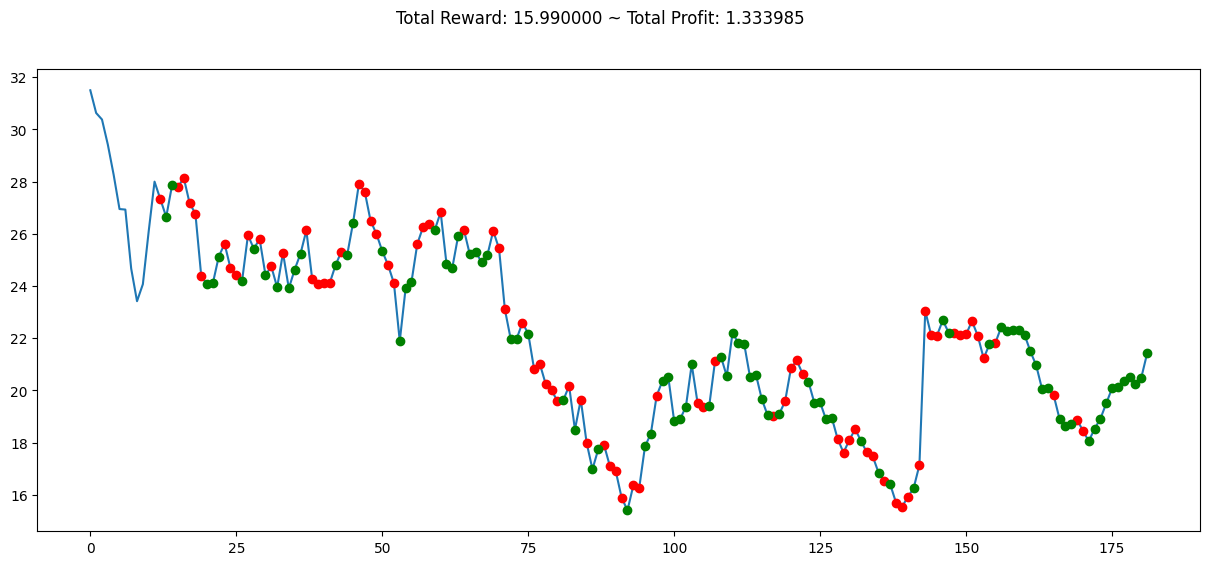

In [60]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(30,200))
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

#Plotting our Model for Trained Trades
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
df.count()

Open      252
High      252
Low       252
Close     252
Volume    252
dtype: int64